# Integración numérica (o "cuadratura")

In [22]:
using Plots, LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [63]:
using Interact

A menudo en la física, es necesario evaluar integrales feas. [La verdad es que casi todas las integrales son feas...] Mientras que la diferenciación es un proceso que se puede llevar a cabo de manera algorítmica, siguiendo una receta, la integración no lo es. De hecho, se puede demostrar que hay integrales que no se pueden llevar a cabo de forma analítica en términos de las funciones elementales. Un ejemplo famoso es la [función error](https://es.wikipedia.org/wiki/Funci%C3%B3n_error),

$$\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^x e^{-t^2/2} \, dt.$$

Por lo tanto, necesitamos encontrar maneras de aproximar integrales definidas, de forma numérica.

Recordemos que la integral 

$$I(f) = \int_a^b f(x) \, dx$$ 

representa el **área debajo de la curva $y=f(x)$ entre $x=a$ y $x=b$**. Por lo tanto, la integración numérica también se llama "cuadratura numérica". [Ver, por ejemplo, https://es.wikipedia.org/wiki/Cuadratura_del_c%C3%ADrculo.] 

Nota que la integral $I(f)$ es una función [de hecho, un "funcional"] **lineal** de $f$. Por lo tanto, buscaremos métodos numéricos con la misma propiedad. Siguiendo la pista que vimos en el notebook sobre la interpolación, pensaremos en evaluar la función $f$ en $N+1$ **nodos** $x_j$, y buscaremos **pesos** $\alpha_i$ que den una aproximación a la integral de la forma

$$Q(f) = \sum_{i=0}^N \alpha_j \, f(x_j) \qquad  (*)$$

**[1]** Un caso particular es una $f$ que sea **monótona**, por ejemplo el integrando $f$ que aparece en la función $\mathrm{erf}$, dado por $f(x) = e^{-x^2/2}$. 

**(i)** La idea más natural [pero ¡no necesariamente mejor!] es dividir el intervalo $[0, x]$ en $N$ intervalos iguales de longitud $h=1/N$. Dada una $x$ y una $N$, dibuja la función, así como líneas verticales punteadas (`linestyle=:dash`) en los nodos.
Grafícalo.

In [20]:
xs = [collect(0:1/N:x)]
#linspace(0, x, 1/N)

1-element Array{Array{Float64,1},1}:
 [0.0,0.5,1.0,1.5,2.0]

In [18]:
collect(0:1/N:x)

5-element Array{Float64,1}:
 0.0
 0.5
 1.0
 1.5
 2.0

In [48]:
xs = collect(0:1/N:X)

21-element Array{Float64,1}:
  0.0
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0
  6.5
  7.0
  7.5
  8.0
  8.5
  9.0
  9.5
 10.0

In [49]:
f.(xs)

21-element Array{Float64,1}:
 1.0        
 0.882497   
 0.606531   
 0.324652   
 0.135335   
 0.0439369  
 0.011109   
 0.00218749 
 0.000335463
 4.00653e-5 
 3.72665e-6 
 2.69958e-7 
 1.523e-8   
 6.69159e-10
 2.28973e-11
 6.10194e-13
 1.26642e-14
 2.04697e-16
 2.57676e-18
 2.52616e-20
 1.92875e-22

In [ ]:
#plot(xs, f.(xs))


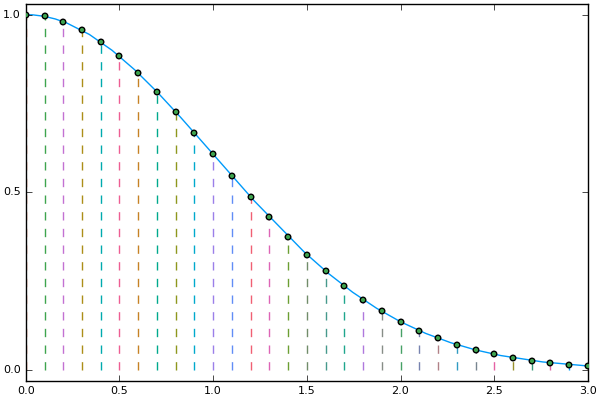

In [64]:

f(x) = exp(-x^2/2)
X = 3.0
N = 10.0
h = 1/N
xs = collect(0:h:X)
#xs = linspace(1, X, N+1)

#@manipulate for i in 0::3

p = plot(f, xlim=(0, 3), legend=false, grid=false) # p es el nombre de la gráfica de f(x)

#for (i,x) in enumerate(xs)
for x in xs
    plot!([x, x], [0, f(x)], ls=:dash, lw=1) # Dibuja las líneas punteadas desde (x, 0) hasta (x, f(x))
end
scatter!(xs, f.(xs)) # Dibuja los puntos (x, f(x))
p # Esto regresa el plot p

**(ii)** La idea más sencilla es aproximar la función $f$ en un intervalo dado con una recta horizontal. 
¿Cómo podríamos calcular tanto una cota inferior como una cota superior, suponiendo que $f$ es monótona? Exprésalos en la forma de la ecuación (*). Grafícalos.

Escribe una función que calcule estas áreas dadas $f$ (monótona), $a$, $b$ y $N$.


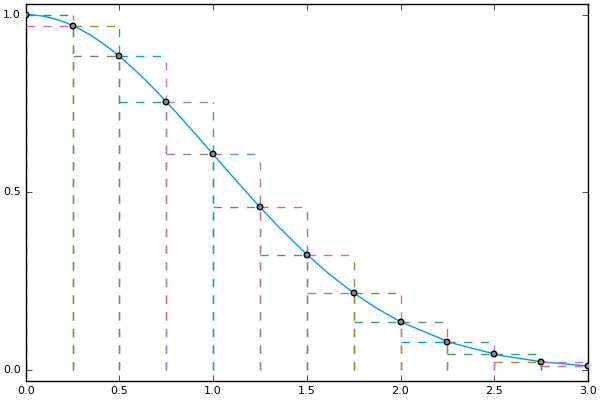

In [102]:
f(x) = exp(-x^2/2)
X = 3.0
N = 4.0
h = 1/N
xs = collect(0:h:X)

p = plot(f, xlim=(0, 3), legend=false, grid=false) # p es el nombre de la gráfica de f(x)

for i in 1:length(xs)
    plot!([xs[i], xs[i]], [0, f(xs[i])], ls=:dash, lw=1) # Dibuja las líneas punteadas desde (x, 0) hasta (x, f(x))
end

for i in 2:length(xs)
    plot!([xs[i - 1], xs[i]], [f(xs[i]), f(xs[i])], ls=:dash, lw=1)
    plot!([xs[i], xs[i]], [0, f(xs[i-1])], ls=:dash, lw=1)
end

for i in 1:length(xs)-1
    plot!([xs[i], xs[i+1]], [f(xs[i]), f(xs[i])], ls=:dash, lw=1)
end
scatter!(xs, f.(xs)) # Dibuja los puntos (x, f(x))
p # Esto regresa el plot p

# 2 Ifs para meter todo en un for
# dentro de las caract: , fill=(0, 0.5) o fill=(x->x^2, 0.5) o fill=(0, 0.5,:red) para rellenar entre cota superior e inferior.

In [105]:
function área(f::Function, a, b, N)
    
    #X = 3.0
    #N = 4.0
    h = 1/N
    xs = collect(a:h:b)
    
    áreas_inf = []
    áreas_sup = []
    
    for k in 2:length(xs) 
        ainf = (xs[k] - xs[k-1]) * (f(xs[k])) #base * altura
        push!(áreas_inf, ainf)
    end
    
     for k in 1:length(xs)-1 
        asup = (xs[k+1] - xs[k]) * (f(xs[k])) #base * altura
        push!(áreas_sup, asup)
    end
    
    inferior = sum(áreas_inf)
    superior = sum(áreas_sup)
    
    dif = superior - inferior
    
    return inferior, superior, dif
end

área (generic function with 1 method)

In [104]:
erf(1)

0.8427007929497149

In [113]:
?erf

search: erf erfi erfc erfcx erfinv erfcinv OverflowError StackOverflowError



```
erf(x)
```

Compute the error function of `x`, defined by $\frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt$ for arbitrary complex `x`.


In [114]:
área(x->exp(-x^2), 0, 1, 10000)

(0.746792526171353,0.746855738227236,6.321205588299961e-5)

In [117]:
0.746792526171353 * (2/(sqrt(π)))

0.8426651286743851

**(iii)** ¿Cuál es la tasa de convergencia hacia el resultado exacto cuando $N \to \infty$ para $f(x) = e^{-x^2/2}$? [Pista: La función $\mathrm{erf}$ en Julia se llama... `erf`. En Julia v0.6, se encontrará en el paquete `SpecialFunctions.jl`.]

**[2] (i)** Dibuja las cotas para $\mathrm{erf}(x)$.

**(ii)** Encuentra una cota superior analítica para $\int_{t=x}^\infty e^{-t^2/t} dt$. [Pista: puedes utilizar, por ejemplo, $f(t) \le e^{-t}$ para $t$ suficientemente grande. [¿Qué tan grande?].] 

**(iii)** Así, encuentra cotas para $\lim_{x \to \infty} \mathrm{erf}(x)$. ¿Cuál valor analítica tiene?

**[3]** (i) Después de una recta horizontal, ¿cuál es la siguiente forma más natural de aproximar a la función $f$ adentro de un intervalo dado? ¿A qué aproximación de la integral lleva, expresada en la forma de la ecuación (*)? Grafícalo.

(ii) Impleméntalo. Nota que este método funciona para *cualquier* función $f$, sin que tenga que ser monótona. 

(iii) ¿Cuál es la tasa de convergencia? ¿Cómo se compara con el método de la pregunta [1]?

**[4]** Lo que estamos haciendo es aproximar la función $f$ en cada sub-intervalo. La siguiente aproximación es una cuadrática, que da una regla llamada el **método de Simpson**.

(i) Utiliza el método de interpolación de Lagrange para encontrar una expresión analítica para un polinomio que interpola la función $f$ en tres puntos: $x_i$, $x_{i+1}$, y el punto medio $m$ entre $x_i$ y $x_{i+1}$.

(ii) Integra este polinomio para encontrar $\int_{x_i}^{x_{i+1}} f(t) \, dt$. 

(iii) Así, encuentra una aproximación para $\int_{a}^{b} f(t) \, dt$.

(iv) Encuentra numéricamente la tasa de convergencia del método.

Cabe mencionar que hay métodos muy precisos, por ejemplo la llamada **cuadratura de Gauss**, que funcionan si la función es suave, en los cuales se utiliza la interpolación de Lagrange para aproximar una función con un polinomio **globalmente en todo el rango $[a,b]$, y luego ¡se integra el polinomio! 

Estos métodos se pueden extender a integrales en más dimensiones.